# Compute enmeble mean and create detrended arrays

In [1]:
import numpy as np          # fundamental package for scientific computing
import glob                 # return all file paths that match a specific pattern
import matplotlib.pyplot as plt 
import os                   # to interact with the operating system

files = glob.glob(os.path.expanduser('~/phase1_CONDA/')+'timeseries/*time_series.npy')

In [2]:
files

['/home/innag3580/phase1_CONDA/timeseries/OSNAPwest_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/bsf_min_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/spgy_dept_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/rapi_dens_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/maxi_dept_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/maxi_dens_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/OSNAPeast_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/spgy_dens_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/rapi_dept_time_series.npy']

In [3]:
for i in range(len(files)):
    # open file
    data = np.load(files[i])
    
    ## create demeaned arrays
    # calculate ensemble mean
    ense_mean = np.nanmean(data, axis=1)
    # create storage array with same shape as data
    data_demean = np.zeros_like(data)
    #data_demean = np.full_like(data, np.nan)
    # subtract ensemble mean from each member
    data_demean = data - ense_mean[:, np.newaxis]
    
    ## to deal with weird situation below
    # Find the indices of NaN values in original array
    nan_indices = np.where(np.isnan(data))
    # Set to NaN in final array at locations of NaN in orginal array
    data_demean[nan_indices] = np.nan

    # save demeaned time series
    # np.save('timeseries/demeaned'+files[i][:-15][10:]+'demeaned_series', data_demean)
    
    # save ensemble mean time series
    #np.save(os.path.expanduser('~/phase1_CONDA/')+'timeseries/ensemble_mean_'+files[i][40:-16], ense_mean)

# Plot ensemble mean

In [8]:
files_ensemble_mean = sorted(glob.glob(os.path.expanduser('~/phase1_CONDA/')+'timeseries/ensemble*.npy'))
time = np.arange(1850,1850+3012/12,1/12)
time_annual = np.arange(1850,1850+3012/12)

# Calculate the annual means by averaging the values in each row
def annual_from_monthly(signal):
    reshaped_data = signal.reshape(-1, 12)
    annual_means = np.mean(reshaped_data, axis=1)
    return annual_means

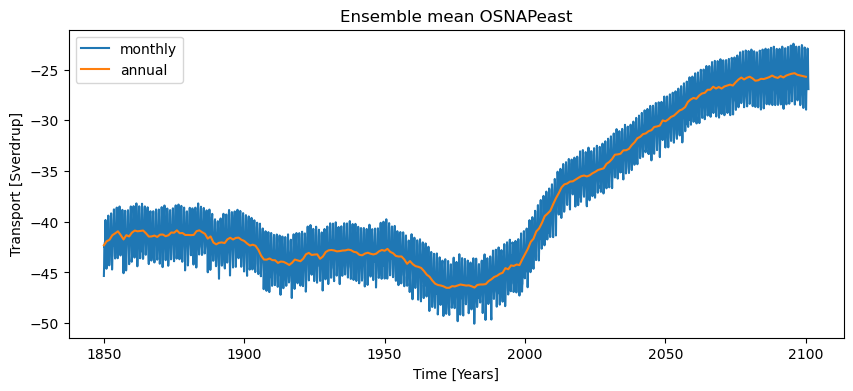

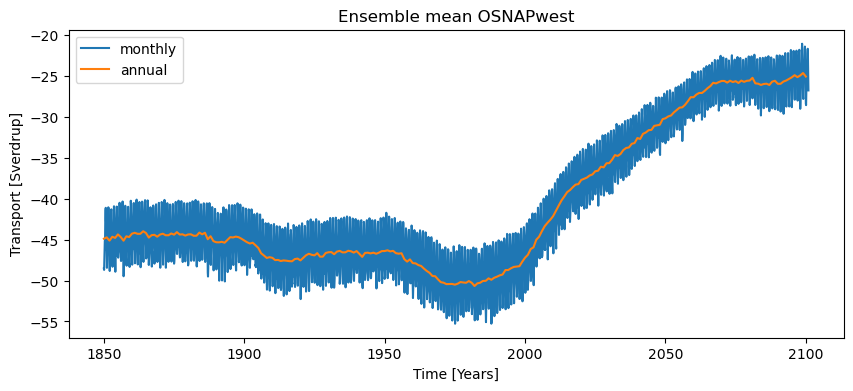

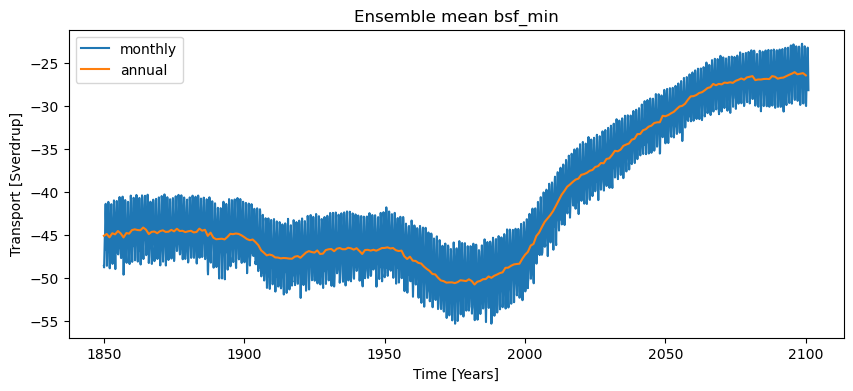

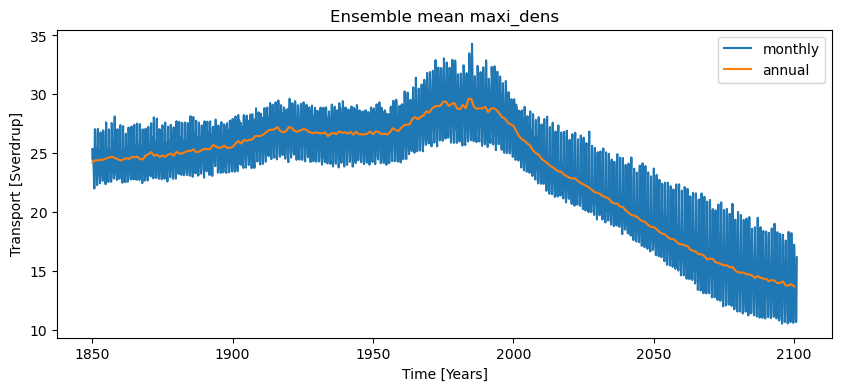

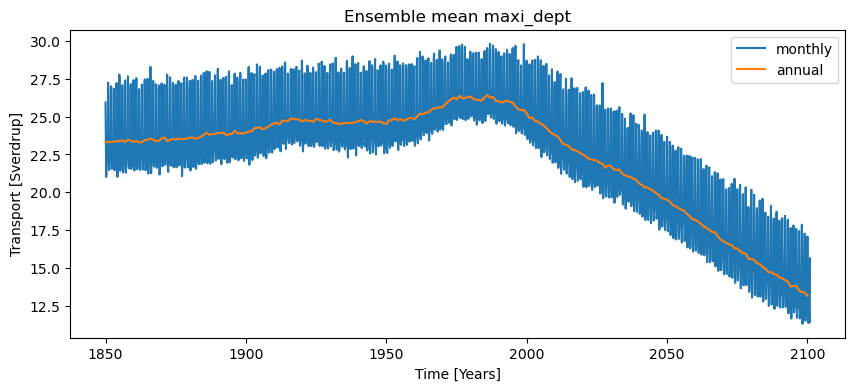

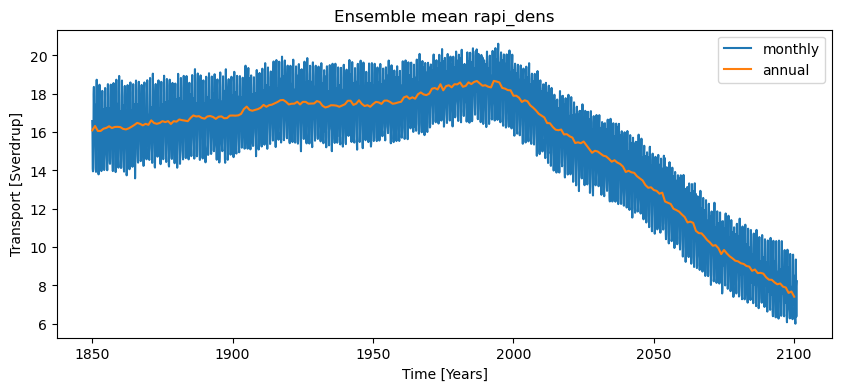

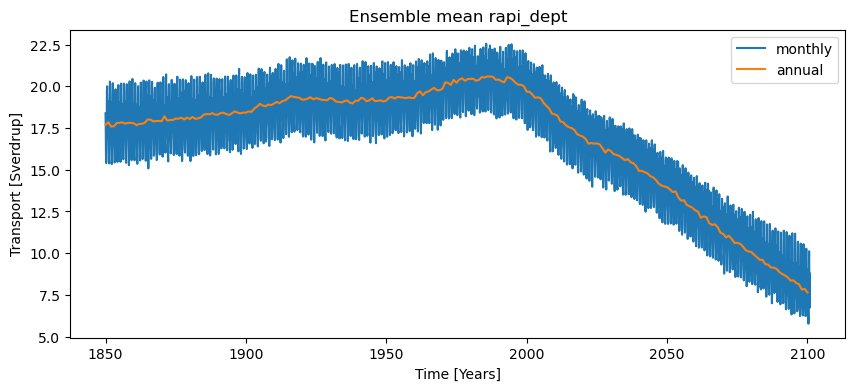

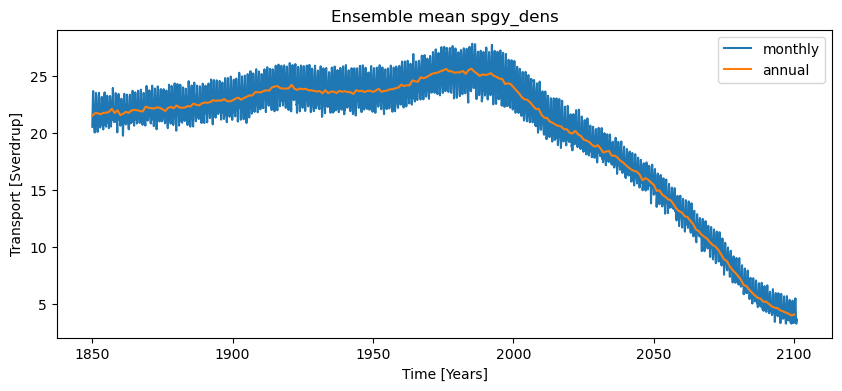

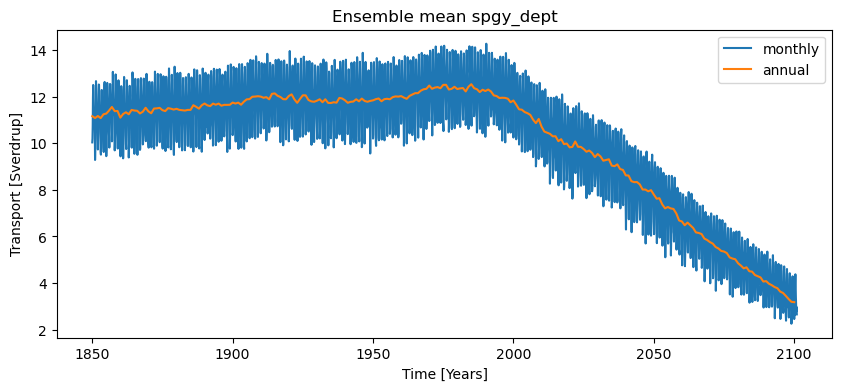

In [9]:
for i in range(len(files_ensemble_mean)):
    ense = np.load(files_ensemble_mean[i])
    ense_annual = annual_from_monthly(ense)
    
    plt.figure(figsize=(10, 4))

    plt.plot(time, ense, label='monthly')
    plt.plot(time_annual, ense_annual, label='annual')

    plt.title('Ensemble mean '+files_ensemble_mean[i][54:-4])
    plt.ylabel('Transport [Sverdrup]')
    plt.xlabel('Time [Years]')

    plt.legend()
    plt.show()
    #plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'ensemble_mean_'+files_ensemble_mean[i][54:-4]+'.png', bbox_inches='tight')

# Perform rolling window on ensemble mean

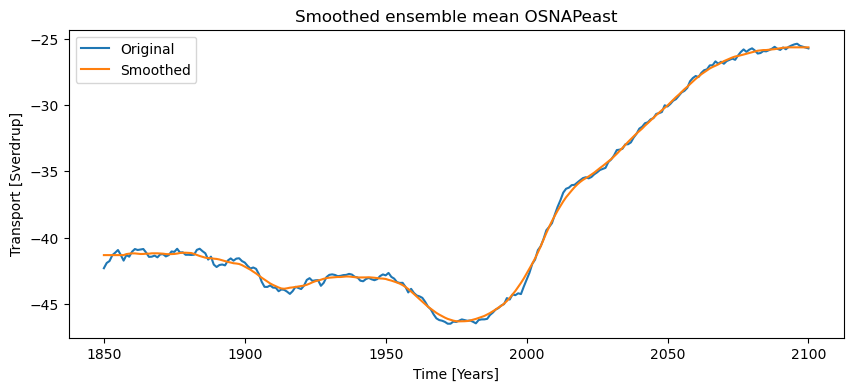

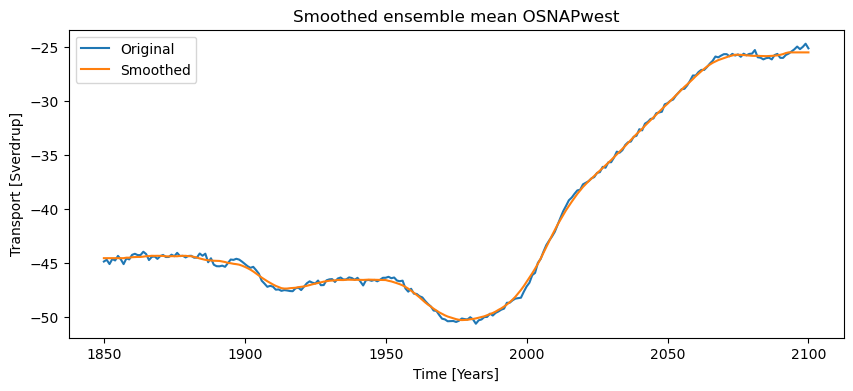

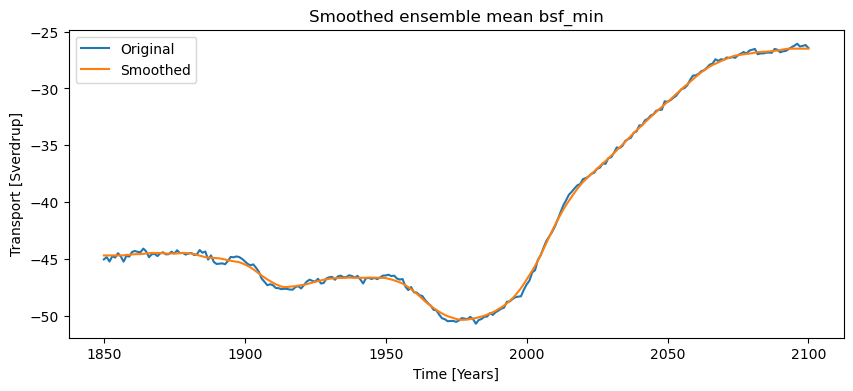

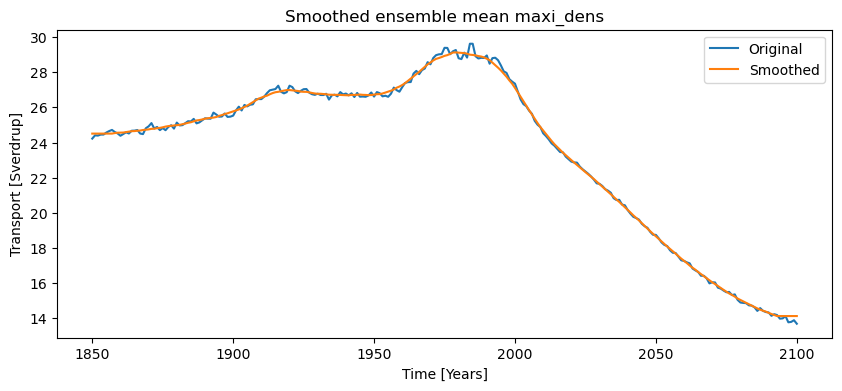

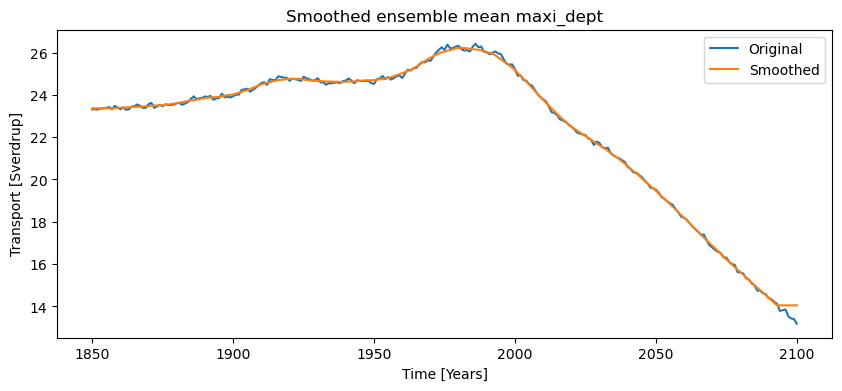

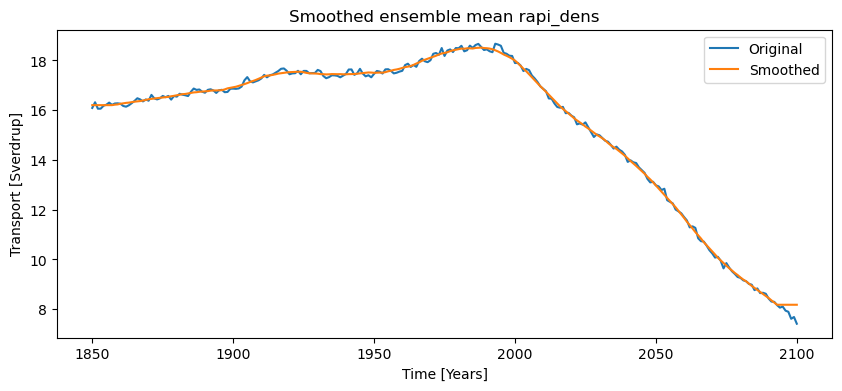

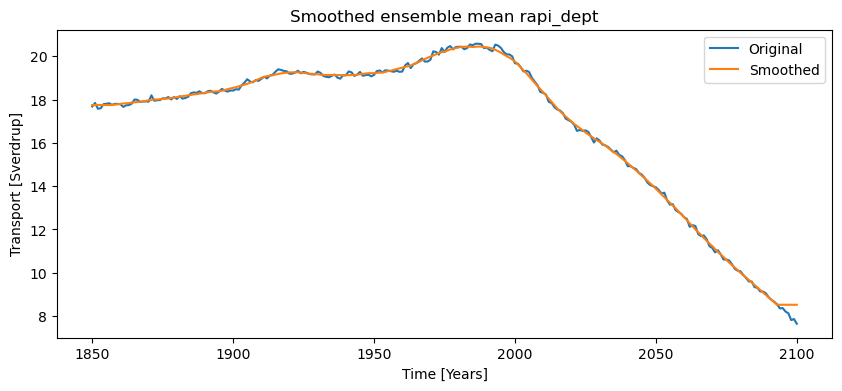

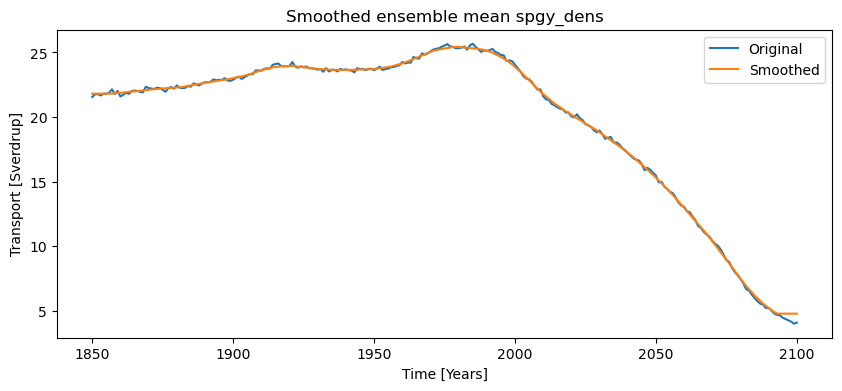

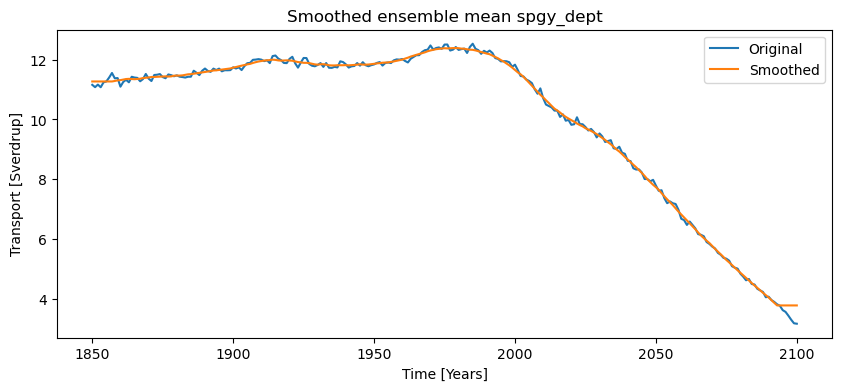

In [17]:
for i in range(len(files_ensemble_mean)):
    ense = np.load(files_ensemble_mean[i])
    ense_annual = annual_from_monthly(ense)
    
    # Define the window for the running mean
    window_size = 30
    window = np.ones(window_size) / window_size

    # Calculate the running mean using numpy.convolve
    running_mean = np.convolve(ense_annual, window, mode='same')

    # Define the boxcar filter with a length of 25
    boxcar = np.ones(15) / 15

    # Apply the filter using numpy.convolve with mode='valid'
    smoothed_data = np.convolve(ense_annual, boxcar, mode='valid')

    # Pad the smoothed data to match the length of time_annual
    padding_size = len(time_annual) - len(smoothed_data)
    smoothed_data_padded = np.pad(smoothed_data, (padding_size // 2, padding_size // 2 + padding_size % 2), mode='edge')

    # Plot the original and smoothed time series
    plt.figure(figsize=(10, 4))

    plt.plot(time_annual, ense_annual, label='Original')
    plt.plot(time_annual, smoothed_data_padded, label='Smoothed')
    
    plt.title('Smoothed ensemble mean '+files_ensemble_mean[i][54:-4])
    plt.ylabel('Transport [Sverdrup]')
    plt.xlabel('Time [Years]')
    
    plt.legend()
    plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'smoothed_ensemble_mean_'+files_ensemble_mean[i][54:-4]+'.png', bbox_inches='tight')
    
    # save smoothed ensemble mean time series
    #np.save(os.path.expanduser('~/phase1_CONDA/')+'timeseries/smoothed_ensemble_mean_'+files[i][40:-16], ense_mean)